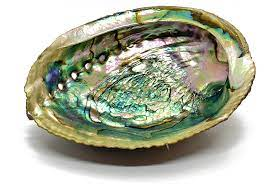

Create a vector with the following values called `names`.
- Length                                                                                   
- Diameter                                                                                 
- Height                                                                                   
- Whole_weight
- Shucked_weight                                                 
- Viscera_weight
- Shell_weight
- Rings

In [6]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [14]:
names = c('sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings')

Read in the abalone data. You can retrieve the link from this URL: [abalone data folder](https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/)

We want the `abalone.data` file.

Use the `col_names` argument with the `names` vector from above to set the column names.

In [15]:
df_abalone = read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', col_names = names)

Rows: 4177 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): sex
dbl (8): length, diameter, height, whole_weight, shucked_weight, viscera_wei...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Is there any missing data? Use `filter` to find out.

In [13]:
df_abalone %>% filter() %>% head

gender,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


Make a scatter plot of `Whole_weight` versus `Shucked_weight` and color the points by `Sex`.

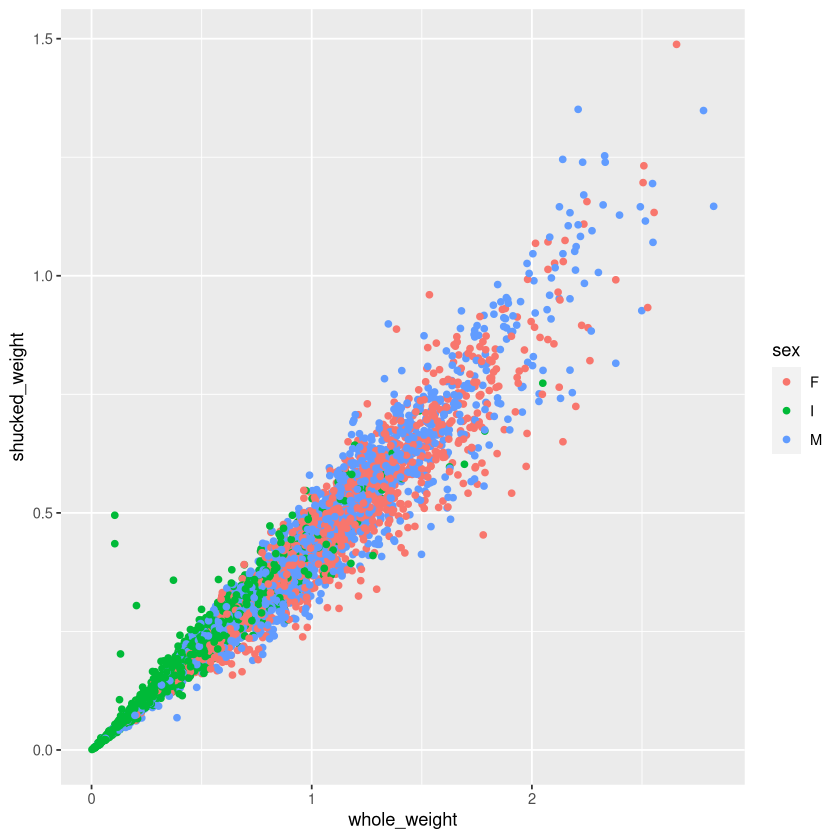

In [21]:
p = ggplot(df_abalone, aes(x = whole_weight, y = shucked_weight, color = sex))

p = p + geom_point()

p

Make a "jitter" chart where the weight catetories are on the `y-axis` and the weight values are on the `x-axis`. Order the chart by median value. 

(Hint: Remember `pivot_longer`)